# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Assignment3_DL

/content/drive/MyDrive/Assignment3_DL


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [4]:
ls

 CarPrice_Assignment.csv
'Car Price Prediction assignment.ipynb'
 compresive_strength_concrete.csv
'Concrete Strength Assignment.ipynb'
 creditcard.csv
'Credit Card Fraud Detection assignment.ipynb'
'Data Dictionary - carprices.xlsx'
 flowers/
 Flowers_Recognition.ipynb
 Ionosphere/
'Ionosphere Assignment.ipynb'
 README.md


In [3]:
data = pd.read_csv('compresive_strength_concrete.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [4]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [7]:
targets = data.iloc[:,-1]
targets

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [8]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
data1 = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
data1

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


##Standardized the Input Variables. Hint: Centeralized the data
Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


In [10]:
np.random.seed(225)
mask = np.random.rand(len(data1)) < 0.70
train_data = data1[mask]
train_targets = targets[mask]
test_data = data1[~mask]
test_targets = targets[~mask]

val_data = train_data[:round(len(data) * 0.2)]
val_targets = train_targets[:round(len(data) * 0.2)]

train_data = train_data[round(len(data) * 0.2):]
train_targets = train_targets[round(len(data) * 0.2):]

In [11]:
len(val_data), len(val_targets)

(206, 206)

In [12]:
mean = train_data.iloc[:,:].mean(axis=0)
mean

Cement (component 1)(kg in a m^3 mixture)                267.314229
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     70.741107
Fly Ash (component 3)(kg in a m^3 mixture)                56.349209
Water  (component 4)(kg in a m^3 mixture)                183.183597
Superplasticizer (component 5)(kg in a m^3 mixture)        5.243083
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     974.936957
Fine Aggregate (component 7)(kg in a m^3 mixture)        774.952569
Age (day)                                                 35.500000
dtype: float64

In [13]:
stndrd = train_data.iloc[:,:].std(axis = 0)
stndrd

Cement (component 1)(kg in a m^3 mixture)                102.254900
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.481325
Fly Ash (component 3)(kg in a m^3 mixture)                64.964921
Water  (component 4)(kg in a m^3 mixture)                 18.213752
Superplasticizer (component 5)(kg in a m^3 mixture)        5.173179
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.907223
Fine Aggregate (component 7)(kg in a m^3 mixture)         73.073624
Age (day)                                                 42.421798
dtype: float64

In [14]:
train_data -= mean
train_data /= stndrd
test_data -= mean
test_data /= stndrd
val_data -= mean
val_data /= stndrd

train_data.head(), test_data.head(), val_data.head()

(     Cement (component 1)(kg in a m^3 mixture)  \
 296                                  -0.962440   
 298                                  -0.962440   
 300                                   0.225767   
 301                                   0.225767   
 302                                   0.225767   
 
      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
 296                                          -0.330026       
 298                                          -0.330026       
 300                                          -0.817993       
 301                                          -0.817993       
 302                                          -0.817993       
 
      Fly Ash (component 3)(kg in a m^3 mixture)  \
 296                                    1.045961   
 298                                    1.045961   
 300                                    0.613420   
 301                                    0.613420   
 302                                    0.613420   


In [15]:
mean_trgts = train_targets.mean()
stndrd_trgts =  train_targets.std()
mean_trgts, stndrd_trgts

(32.5000790513834, 15.331247557746462)

In [16]:
train_targets -= mean_trgts
train_targets /= stndrd_trgts

test_targets -= mean_trgts
test_targets /= stndrd_trgts

val_targets -= mean_trgts
val_targets /= stndrd_trgts


train_targets.head(), test_targets.head(), val_targets.head()

(296   -0.090017
 298    1.020786
 300    0.141536
 301    0.146102
 302    0.820541
 Name: Concrete compressive strength(MPa, megapascals) , dtype: float64,
 5     0.947732
 9     0.442881
 11   -0.292219
 12    0.685523
 13    0.641169
 Name: Concrete compressive strength(MPa, megapascals) , dtype: float64,
 0    3.097590
 1    1.916995
 2    0.506803
 3    0.557679
 4    0.769665
 Name: Concrete compressive strength(MPa, megapascals) , dtype: float64)

##Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
##Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)


In [62]:
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(6, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [63]:
network.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


##Train the Model with Epochs (100) and validate it
If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .


In [64]:
history = network.fit(train_data, train_targets, epochs = 75, batch_size = 1, validation_data=(val_data, val_targets))

Epoch 1/75
506/506 [==============================] - 1s 997us/step - loss: 0.9337 - mae: 0.7873 - val_loss: 1.2837 - val_mae: 0.9047
Epoch 2/75
506/506 [==============================] - 0s 721us/step - loss: 0.7139 - mae: 0.6677 - val_loss: 0.8001 - val_mae: 0.7489
Epoch 3/75
506/506 [==============================] - 0s 741us/step - loss: 0.5981 - mae: 0.6269 - val_loss: 0.8777 - val_mae: 0.7408
Epoch 4/75
506/506 [==============================] - 0s 770us/step - loss: 0.4259 - mae: 0.5187 - val_loss: 0.6865 - val_mae: 0.6887
Epoch 5/75
506/506 [==============================] - 0s 746us/step - loss: 0.3835 - mae: 0.5021 - val_loss: 0.7357 - val_mae: 0.6770
Epoch 6/75
506/506 [==============================] - 0s 725us/step - loss: 0.3311 - mae: 0.4635 - val_loss: 0.7210 - val_mae: 0.6603
Epoch 7/75
506/506 [==============================] - 0s 725us/step - loss: 0.2991 - mae: 0.4156 - val_loss: 0.5629 - val_mae: 0.6083
Epoch 8/75
506/506 [==============================] - 0s 781us

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

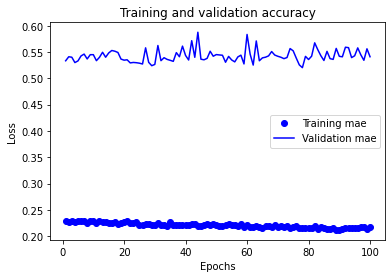

In [106]:
plt.clf()
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Evaluation Step



In [65]:
x = network.evaluate(test_data, test_targets)

10/10 [==============================] - 0s 1ms/step - loss: 0.2249 - mae: 0.3443


##Prediction

In [93]:
all_predict = network.predict(test_data)

In [96]:
print(all_predict[-2] * stndrd_trgts + mean_trgts)
print(test_targets.iloc[-2] * stndrd_trgts + mean_trgts)

[36.4701]
37.92
